In [ ]:
install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(mlbench)
library(dplyr)

data("BostonHousing2")
dat <- BostonHousing2 %>%
  select(-c("town", "lat", "lon", "tract", "medv"))

fit.full <- lm(cmedv ~ ., data = dat)

fit.null <- lm(cmedv ~ 1, data = dat)


In [ ]:
fit.forward <- step(fit.null,
                    scope = list(lower = ~1, upper = fit.full),
                    direction = "forward",
                    trace = FALSE,
                    k = 2,
                    keep = function(model, aic) list(model = model, aic = aic))

fifth_model <- fit.forward$keep[[5]]$model
print(summary(fifth_model))


     cmedv           lstat             rm       
 Min.   : 5.00   Min.   : 1.73   Min.   :3.561  
 1st Qu.:17.02   1st Qu.: 6.95   1st Qu.:5.886  
 Median :21.20   Median :11.36   Median :6.208  
 Mean   :22.53   Mean   :12.65   Mean   :6.285  
 3rd Qu.:25.00   3rd Qu.:16.95   3rd Qu.:6.623  
 Max.   :50.00   Max.   :37.97   Max.   :8.780  


In [ ]:

aic_values <- sapply(fit.forward$keep, function(x) {
  if (is.numeric(x)) return(x)
  return(NA)
})

aic_values <- na.omit(aic_values)

num_predictors <- seq_along(aic_values)


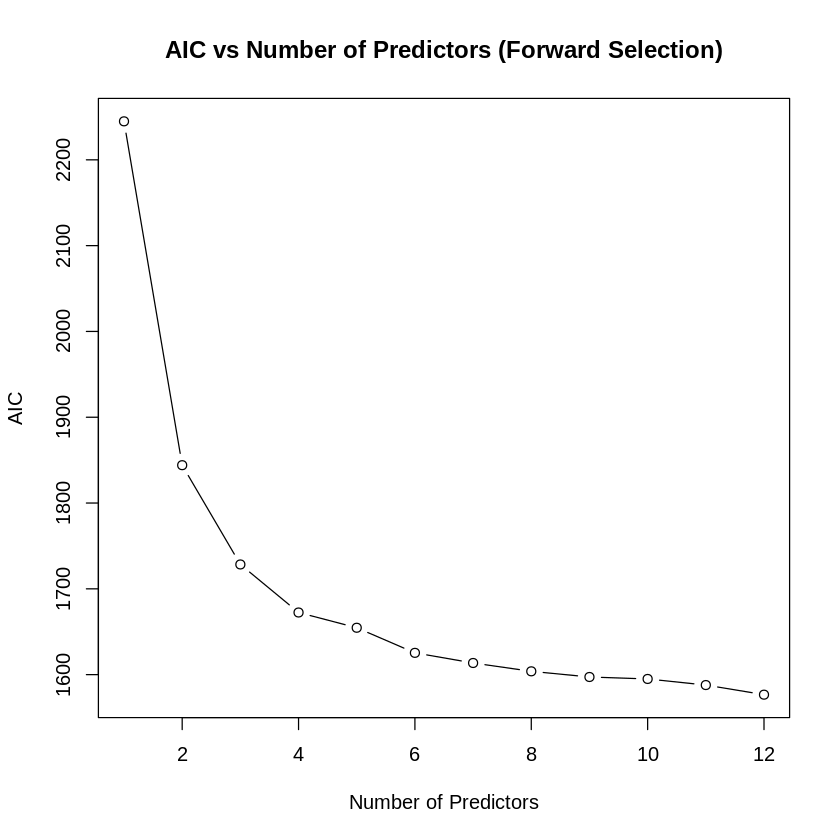

In [ ]:
plot(
  num_predictors, aic_values, type = "b",
  xlab = "Number of Predictors", ylab = "AIC",
  main = "AIC vs Number of Predictors (Forward Selection)"
)


In [ ]:
print(fit.forward$keep)

      [,1]    [,2]    [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
model lm,12   lm,12   lm,12    lm,12    lm,12    lm,12    lm,13    lm,13   
aic   2244.87 1844.13 1728.426 1672.444 1654.666 1625.411 1613.595 1603.882
      [,9]     [,10]    [,11]    [,12]   
model lm,13    lm,13    lm,13    lm,13   
aic   1597.281 1594.994 1587.877 1576.677


In [ ]:
bic_values <- as.numeric(fit.forward$keep["bic", ])

bic_values <- na.omit(bic_values)

if (length(bic_values) > 0) {
  num_predictors <- seq_along(bic_values)

  plot(
    num_predictors, bic_values, type = "b",
    xlab = "Number of Predictors", ylab = "BIC",
    main = "BIC vs Number of Predictors (Forward Selection)"
  )

  best_model_index <- which.min(bic_values)
  best_model <- fit.forward$keep["model", best_model_index]

  print(summary(best_model))
} else {
  print("No valid BIC values found.")
}

ERROR: Error in fit.forward$keep["bic", ]: subscript out of bounds


In [ ]:
selected_model <- fit.forward$keep["model", stop_index][[1]]
print(summary(selected_model))

we select lm(formula = cmedv ~ lstat + rm + ptratio + dis + nox + chas + b + zn, data = dat) because it's last model before BIC value starts to increase.

In [ ]:
fit.backward <- step(fit.full,
                     direction = "backward",
                     trace = FALSE,
                     k = log(nrow(dat)),
                     keep = function(model, aic) list(model = model, bic = BIC(model)))


bic_values <- as.numeric(fit.backward$keep["bic", ])

bic_values <- na.omit(bic_values)

if (length(bic_values) > 0) {
  stop_index <- which(diff(bic_values) > 0)[1]

  if (is.na(stop_index)) {
    stop_index <- length(bic_values)
  }

  selected_model <- fit.backward$keep["model", stop_index][[1]]

  print(summary(selected_model))
} else {
  print("No valid BIC values found.")
}

we select lm(formula = cmedv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + b + lstat, data = dat) as it is the last model before the BIC value starts to increase, meaning that removing more predictors would not improve our model.

In [ ]:
fit.null <- lm(cmedv ~ 1, data = dat)

fit.full <- lm(cmedv ~ ., data = dat)

fit.stepwise.aic <- step(fit.null,
                         scope = list(lower = fit.null, upper = fit.full),
                         direction = "both",
                         trace = FALSE)

summary(fit.stepwise.aic)

In [ ]:
fit.stepwise.bic <- step(fit.null,
                         scope = list(lower = fit.null, upper = fit.full),
                         direction = "both",
                         trace = FALSE,
                         k = log(nrow(dat)))

summary(fit.stepwise.bic)

Q2, part d

In [ ]:
omega <- pi / 4
n <- 100
set.seed(42)

simulate <- function(n, omega) {
  A <- rchisq(1, df = 1)
  Theta <- runif(1, 0, 2 * pi)
  t <- 1:n
  x_t <- A * cos(omega * t + Theta)
  return(x_t)
}


s1 <- simulate(n, omega)
s2 <- simulate(n, omega)
s3 <- simulate(n, omega)


plot(1:n, series1, type = "l", col = "blue", ylim = range(c(s1, s2, s3)),
     ylab = "Amplitude", xlab = "t")
lines(1:n, series2, col = "orange")
lines(1:n, series3, col = "red")
legend("topright", legend = c("Series 1", "Series 2", "Series 3"),
       col = c("blue", "orange", "red"), lty = 1)

In [ ]:
amplitude_series1 <- max(abs(s1))
amplitude_series2 <- max(abs(s2))
amplitude_series3 <- max(abs(s3))

amplitude_series1
amplitude_series2
amplitude_series3
